<a href="https://colab.research.google.com/github/Skp80/ComputerVision/blob/main/Understanding_selectivesearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install selectivesearch
!pip install torch_snippets
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb
from skimage import data, io
from matplotlib import pyplot as plt
from google.colab import 

  Created wheel for selectivesearch: filename=selectivesearch-0.4-cp36-none-any.whl size=4359 sha256=903d6f44db4848bf55d8ead9c6db4a1855df104c4ae2e3003afb868557dad62c
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 102kB 12.1MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=060b1df9672fed46ca137057e55eaaf3e8cda48f2fe64740513d4ecb744b8679
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars


In [21]:
!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
img = read('Hemanvi.jpeg', 1)

--2021-01-26 07:40:20--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2021-01-26 07:40:20--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbb86587bf80aedf0f79ffa3797.dl.dropboxusercontent.com/cd/0/inline/BHu3GMpZYm6D6r_QJnobkxSpcw8DYyHIWreXdrfdNRgq8h_t1XL4GdIPBmAkUYnRci-DPQvTkWOVNmO7vLEgwl-AaCKCAH8hlzBEfjNYkIJlPg/file# [following]
--2021-01-26 07:40:21--  https://ucbb86587bf80aedf0f79ffa3797.dl.dropboxusercontent.com/cd/0/inline/BHu3GMpZYm6D6r_QJnobkxSpcw8DYyHIWreXdrfdNRgq8h_t1XL4GdIPBmAkUYnRci-DPQvTkWOVNmO7vLEgwl-AaCKCAH8hlzBEfjNYkIJlPg/file
Resolving ucbb86

In [26]:
##segments_fz = felzenszwalb(img, scale=200)
segments_fz_color = felzenszwalb(img, scale=200, multichannel=True)

2021-01-26 07:45:36.972 | INFO     | torch_snippets.loader:subplots:400 - plotting 2 images in a grid of 1x2 @ (10, 10)


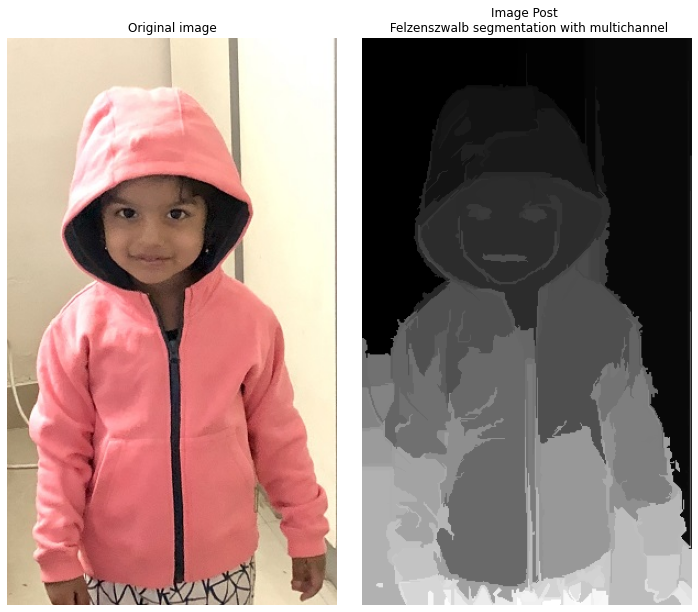

In [28]:
##subplots([img, segments_fz], titles=['Original Image','Image post \nfelzenszwalb segmentation'], figsize=(10,10), nc=2)
subplots([img,segments_fz_color], titles=['Original image', 'Image Post \n Felzenszwalb segmentation with multichannel'], figsize=(10,10), nc=2 )

In [29]:
def extract_candidates(img):
    img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] in candidates: continue
        if r['size'] < (0.05*img_area): continue
        if r['size'] > (1*img_area): continue
        x, y, w, h = r['rect']
        candidates.append(list(r['rect']))
    return candidates


In [30]:
!pip install selectivesearch
!pip install torch_snippets
from torch_snippets import *
import selectivesearch
!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
img = read('Hemanvi.jpeg', 1)

--2021-01-26 07:45:58--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2021-01-26 07:45:58--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbb86587bf80aedf0f79ffa3797.dl.dropboxusercontent.com/cd/0/inline/BHu3GMpZYm6D6r_QJnobkxSpcw8DYyHIWreXdrfdNRgq8h_t1XL4GdIPBmAkUYnRci-DPQvTkWOVNmO7vLEgwl-AaCKCAH8hlzBEfjNYkIJlPg/file# [following]
--2021-01-26 07:45:58--  https://ucbb86587bf80aedf0f79ffa3797.dl.dropboxusercontent.com/cd/0/inline/BHu3GMpZYm6D6r_QJnobkxSpcw8DYyHIWreXdrfdNRgq8h_t1XL4GdIPBmAkUYnRci-DPQvTkWOVNmO7vLEgwl-AaCKCAH8hlzBEfjNYkIJlPg/file
Resolving ucbb86

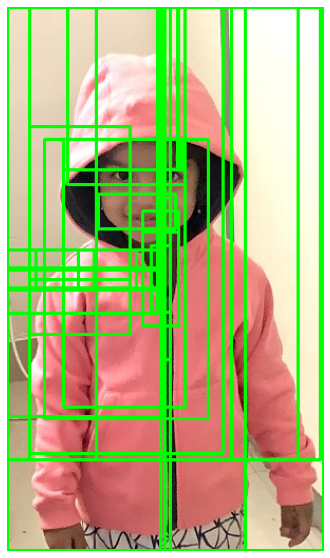

In [31]:
candidates = extract_candidates(img)
show(img, bbs = candidates)